# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename)

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

We chose the World Happiness Report (WHR) Data Set, and we will be predicting happiness score aka “Life Ladder” as the label. This would be considered a supervised learning problem because we have a distinct label we want to predict: “Life Ladder.” We are going to try to identify which features might influence happiness by using inputs like “Social support,” “Freedom to make life choices,” “Perceptions of corruption,” and more to see which countries may value specific attributes for happiness. This is a regression problem because “Life Ladder” is a continuous numerical value that can change based on various factors. This is neither a binary nor multi-class classification problem because “Life Ladder” is numerical, not categorical. Possible features can be: Country, year, Log GDP per capita, Social support, Health life expectancy at birth, Perceptions of corruption, Generosity, Positive affect, Negative affect, Confidence in national government, Democratic Quality. A company could create value with a model that predicts this label to help employee well-being and employee retention. Let’s say a company is experiencing quick employee turnover and does not understand why particularly, this model can help the company understand what factors are influencing employee happiness (which in turn can affect performance and retention rates). This can largely benefit big companies where it’s hard to gauge emotions of all employees or even HR teams that want to work on expanding their company.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE

print("First 5 rows of WHR data set:")
print(df.head())
dims = df.shape
print()
print("Number of rows: ", dims[0])
print("Number of columns: ", dims[1])
print()

print("Observing column types and null values:")
columns = list(df.columns)
print("Column names: ", columns)
print(df.info())
print(df.isnull().sum())
print()

column_dtypes = df.dtypes
print("Different data types: ", column_dtypes)

First 5 rows of WHR data set:
       country  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.168690        0.450662   
1  Afghanistan  2009     4.401778            7.333790        0.552308   
2  Afghanistan  2010     4.758381            7.386629        0.539075   
3  Afghanistan  2011     3.831719            7.415019        0.521104   
4  Afghanistan  2012     3.782938            7.517126        0.520637   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         49.209663                      0.718114    0.181819   
1                         49.624432                      0.678896    0.203614   
2                         50.008961                      0.600127    0.137630   
3                         50.367298                      0.495901    0.175329   
4                         50.709263                      0.530935    0.247159   

   Perceptions of corruption  Positive affec

In [4]:
# descriptive statistics
print("Descriptive statistics:")
print(df.describe()) # numeric features
print(df.describe(include='object')) # categorical features
print()

Descriptive statistics:
              year  Life Ladder  Log GDP per capita  Social support  \
count  1562.000000  1562.000000         1535.000000     1549.000000   
mean   2011.820743     5.433676            9.220822        0.810669   
std       3.419787     1.121017            1.184035        0.119370   
min    2005.000000     2.661718            6.377396        0.290184   
25%    2009.000000     4.606351            8.310665        0.748304   
50%    2012.000000     5.332600            9.398610        0.833047   
75%    2015.000000     6.271025           10.190634        0.904329   
max    2017.000000     8.018934           11.770276        0.987343   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       1553.000000                   1533.000000   
mean                          62.249887                      0.728975   
std                            7.960671                      0.145408   
min                           37.766476     

<AxesSubplot:label='adf2d996-b32a-4256-afd0-7ddbf53218a7', xlabel='Freedom to make life choices', ylabel='Count'>

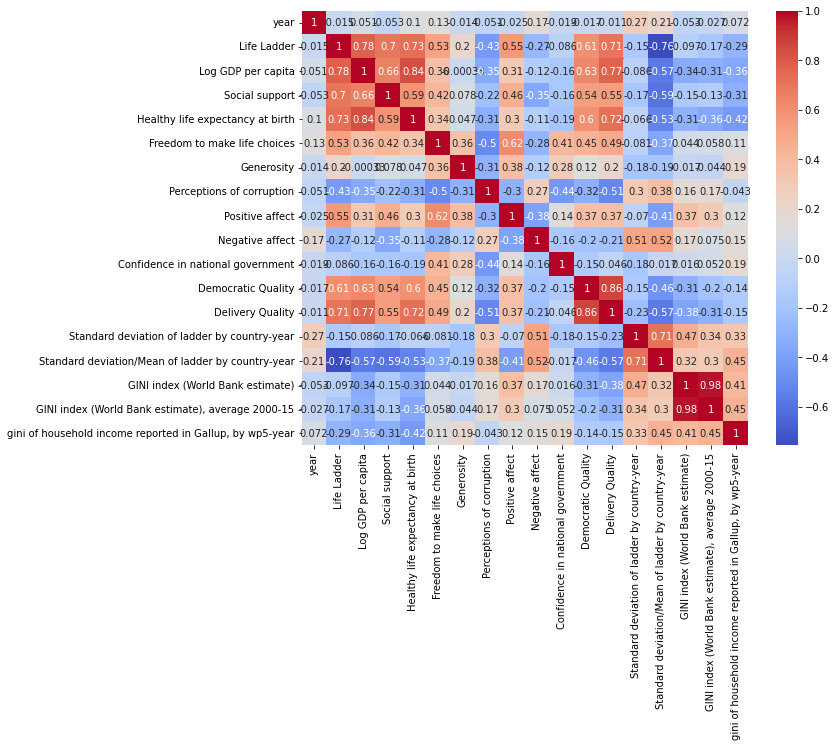

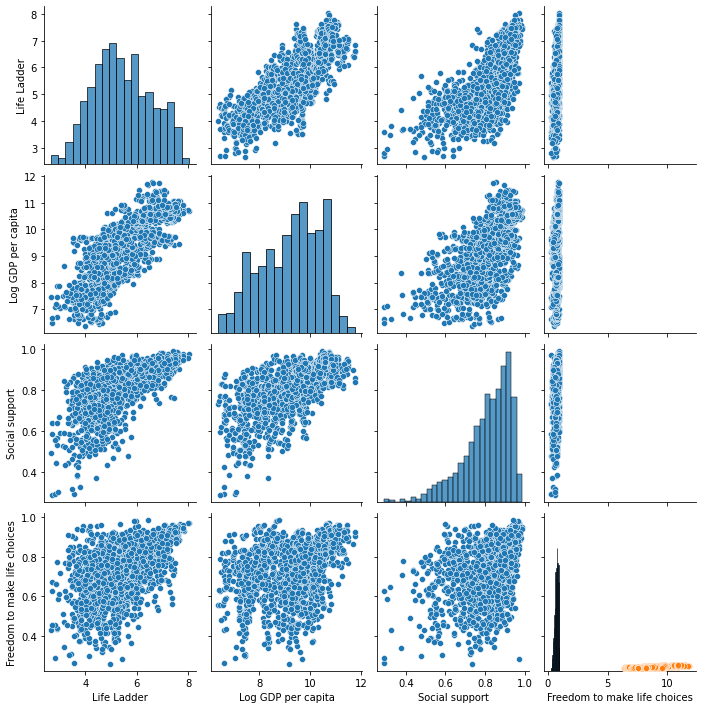

In [5]:
# plots
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm")

sns.pairplot(df, vars=['Life Ladder', 'Log GDP per capita', 'Social support', 'Freedom to make life choices'])
sns.scatterplot(data=df, x='Log GDP per capita', y='Life Ladder')

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

We plan to keep the same feature list that we decided on previously, which were all the columns except for our label column ("Life Ladder"). Part of our original plan was to select appropriate features and remove any irrelevant features to our problem, which we have already done. Then, to streamline the naming convention of our feature columns and label column, we want to rename the columns to make sure they all match each other in terms of capitalization and removing unnecessary pieces of their names. As for data preparation, we first plan on addressing missingness by replacing missing values with appropriate values. We also want to identify any outliers and replace them. The World Happiness Report (WHR) data set does not have any categorical features, other than country, which is an Object datatype. But since object and categorical datatypes are similar, we can deal with them in a similar way using one-hot encoding. We are thinking of using a tree-based model such as a Decision Tree or Random Forest, so another option could be using label encoding to prep the country column. Label encoding will essentially assign an integer to each country, but we'd have to be mindful that the integer will not represent any order, and that they are just numerical labels for each country.

In this lab, we are aiming to train multiple different models using Linear Regression (LR), Decision Tree (DT), Random Forest (RF), Gradient Boosted Decision Tree (GBDT), and Stacking Regressor. We then are going to evaluate them against each other to see which model performs the best. For DT, we'll tune hyperparameters such as the maximum depth, minimum samples per leaf, and splitting criteria. For the Random Forest, we plan to tune the number of trees, maximum depth, and minimum sample split. We also want to do hyperparameter tuning using GridSearch, which will be a systematic way to find the best combination of hyperparameters from a specified set we define. We then want to use k-fold cross-validation on the training data to estimate the model's performance and reduce overfitting. By evaluating performance metrics such as accuracy_score, we can then select a model (either DT, RF, GBDT, LR, or Stacking Regressor) based on how well it is performing on the test data. We can then improve upon the chosen model by experimenting with feature engineering, or considering other methods typically used with that specific model.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [6]:
# YOUR CODE HERE
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [7]:
# Prepare Data - Rename Columns
col_rename = {'country': 'Country', 'year': 'Year', 'Log GDP per capita': 'GDP', 'Social support': 'Social Support', 'Healthy life expectancy at birth': 'Life Expectancy', 'Freedom to make life choices': 'Freedom', 
              'Perceptions of corruption': 'Corruption Perception', 'Positive affect': 'Positive Effect', 'Negative affect': 'Negative Effect', 
              'Confidence in national government': 'Confidence in Government', 'GINI index (World Bank estimate)': 'GINI Index', 
              'GINI index (World Bank estimate), average 2000-15': 'Average GINI Index', 
              'gini of household income reported in Gallup, by wp5-year': 'Household Income GINI'}
df = df.rename(columns = col_rename)
df.columns

Index(['Country', 'Year', 'Life Ladder', 'GDP', 'Social Support',
       'Life Expectancy', 'Freedom', 'Generosity', 'Corruption Perception',
       'Positive Effect', 'Negative Effect', 'Confidence in Government',
       'Democratic Quality', 'Delivery Quality',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year', 'GINI Index',
       'Average GINI Index', 'Household Income GINI'],
      dtype='object')

In [8]:
# Prepare Data - Remove Outliers in Label Column using Winzorization
df['Life Ladder Label'] = stats.mstats.winsorize(df['Life Ladder'], limits=[0.01, 0.01])
win_diff = df['Life Ladder Label'] - df['Life Ladder']
win_diff.unique()

array([ 0.        ,  0.0433681 ,  0.51254559,  0.26972866, -0.03541756,
        0.4812026 , -0.40400553, -0.21930456, -0.35596323, -0.06842995,
       -0.15558672, -0.17330313, -0.05752039, -0.05569792, -0.04491472,
       -0.17332316,  0.47267246, -0.01608324, -0.01735878, -0.06334829,
        0.17701268,  0.28615141,  0.35764122, -0.16128016,  0.00977254,
        0.48671079,  0.27152944,  0.36640859,  0.23804283,  0.33530498,
        0.19158983])

In [9]:
# Prepare Data - Evaluate Missing Values
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

Country                                                0
Year                                                   0
Life Ladder                                            0
GDP                                                   27
Social Support                                        13
Life Expectancy                                        9
Freedom                                               29
Generosity                                            80
Corruption Perception                                 90
Positive Effect                                       18
Negative Effect                                       12
Confidence in Government                             161
Democratic Quality                                   171
Delivery Quality                                     171
Standard deviation of ladder by country-year           0
Standard deviation/Mean of ladder by country-year      0
GINI Index                                           979
Average GINI Index             

In [10]:
# Prepare Data - Drop columns that will not provide predictive value or have too many missing values
df = df.drop(columns = ['Country', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 
                        'Average GINI Index', 'Household Income GINI'])

In [11]:
# Prepare Data - Impute Missing Values
impute_cols = ['GDP', 'Social Support', 'Life Expectancy', 'Freedom', 'Generosity', 'Corruption Perception', 'Positive Effect', 'Negative Effect', 
                'Confidence in Government', 'Democratic Quality', 'Delivery Quality', 'GINI Index'] 

for col in impute_cols:
    df[col].fillna(value = df[col].mean(), inplace = True)

In [12]:
# Prepare Data - Confirm No Missing Values
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

Year                        0
Life Ladder                 0
GDP                         0
Social Support              0
Life Expectancy             0
Freedom                     0
Generosity                  0
Corruption Perception       0
Positive Effect             0
Negative Effect             0
Confidence in Government    0
Democratic Quality          0
Delivery Quality            0
GINI Index                  0
Life Ladder Label           0
dtype: int64

In [13]:
# Prepare Data - Split for modeling
y = df['Life Ladder Label']
features = [col for col in df.columns if col != 'Life Ladder' and col != 'Life Ladder Label']
X = df[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

In [14]:
# Modeling - Run Linear Regression 
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)

In [15]:
# Modeling - Evaluate Linear Regression
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared = False)
lr_r2 = r2_score(y_test, y_lr_pred)

print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.5463363860863216
[LR] R2: 0.7654985423156566


In [16]:
# Modeling - Set Up Parameter Grid and Decision Tree Regressor
dt_param_grid = {'max_depth': [4, 8, 12, 16], 'min_samples_leaf': [25, 50, 75, 100]}

print('Running Grid Search...')

dt_regressor = DecisionTreeRegressor()
dt_grid = GridSearchCV(dt_regressor, dt_param_grid, cv = 3, scoring = 'neg_root_mean_squared_error')
dt_grid_search = dt_grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [17]:
# Modeling - Evaluate Best Parameters for Decision Tree Regressor and its Performance
rmse_DT = -1 * dt_grid_search.best_score_
dt_best_params = dt_grid_search.best_params_

print("[DT] RMSE for the best model is : {:.2f}".format(rmse_DT) )
print('Best DT: Parameters:', dt_best_params)

[DT] RMSE for the best model is : 0.54
Best DT: Parameters: {'max_depth': 12, 'min_samples_leaf': 25}


In [18]:
# Modeling - Set Up Parameter Grid and Random Forest Regressor
rf_param_grid = {'max_depth': [2, 4, 8, 12, 16], 'min_samples_leaf': [25, 50, 75, 100], 'n_estimators': [100, 200, 300, 400, 500]}

print('Begin RF Implementation...')

rf_model = RandomForestRegressor()
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv = 3, scoring = 'neg_root_mean_squared_error')
rf_grid_search = rf_grid.fit(X_train, y_train)

print('End')

Begin RF Implementation...
End


In [19]:
# Modeling - Evaluate Best Parameters for Random Forest Regressor and its Performance
rmse_rf = -1 * rf_grid_search.best_score_
rf_best_params = rf_grid_search.best_params_

print("[RF] RMSE for the best model is : {:.2f}".format(rmse_rf) )
print('Best RF Parameters:', rf_best_params)

[RF] RMSE for the best model is : 0.49
Best RF Parameters: {'max_depth': 16, 'min_samples_leaf': 25, 'n_estimators': 500}


In [20]:
# Modeling - Set Up Parameter Grid and GBDT Regressor
gbdt_param_grid = {'max_depth': [2, 4, 8, 12, 16], 'min_samples_leaf': [25, 50, 75, 100], 'n_estimators': [100, 200, 300, 400, 500]}

print('Begin GBDT Implementation...')

gbdt_model = GradientBoostingRegressor()
gbdt_grid = GridSearchCV(gbdt_model, gbdt_param_grid, cv = 3, scoring = 'neg_root_mean_squared_error')
gbdt_grid_search = gbdt_grid.fit(X_train, y_train)

print('End')

Begin GBDT Implementation...
End


In [21]:
# Modeling - Evaluate Best Parameters for GBDT Regressor and its Performance
rmse_gbdt = -1 * gbdt_grid_search.best_score_
gbdt_best_params = gbdt_grid_search.best_params_

print("[GBDT] RMSE for the best model is : {:.2f}".format(rmse_gbdt) )
print('Best GBDT Parameters:', gbdt_best_params)

[GBDT] RMSE for the best model is : 0.42
Best GBDT Parameters: {'max_depth': 16, 'min_samples_leaf': 25, 'n_estimators': 500}


In [22]:
# Modeling - Run Stacking Regressor
estimators = [("DT", DecisionTreeRegressor(max_depth=8, min_samples_leaf=25)),
              ("LR", LinearRegression())]

print('Implement Stacking...')

stacking_model = StackingRegressor(estimators = estimators, passthrough = False)
stacking_model.fit(X_train, y_train)

print('End')

Implement Stacking...
End


In [23]:
# Modeling - Evaluate Stacking Regressor
stacking_pred = stacking_model.predict(X_test)
stack_rmse = mean_squared_error(y_test, stacking_pred, squared = False)
stack_r2 = r2_score(y_test, stacking_pred)

print('Root Mean Squared Error: {0}'.format(stack_rmse))
print('R2: {0}'.format(stack_r2))                       

Root Mean Squared Error: 0.48002275969160796
R2: 0.8189706657043551


In [24]:
# Modeling - Run Decision Tree with Best Parameters
dt_final = DecisionTreeRegressor(max_depth = 8, min_samples_leaf = 25)
dt_final.fit(X_train, y_train)
dt_final_pred = dt_final.predict(X_test)

dt_final_rmse = mean_squared_error(y_test, dt_final_pred, squared = False)
dt_final_r2 = r2_score(y_test, dt_final_pred)


print('[RF] Root Mean Squared Error: {0}'.format(dt_final_rmse))
print('[RF] R2: {0}'.format(dt_final_r2))             

[RF] Root Mean Squared Error: 0.49870223004562214
[RF] R2: 0.8046074880978641


In [25]:
# Modeling - Run Random Forest with Best Parameters
rf_final = RandomForestRegressor(max_depth = 16, min_samples_leaf = 25, n_estimators = 500)
rf_final.fit(X_train, y_train)
rf_final_pred = rf_final.predict(X_test)

rf_final_rmse = mean_squared_error(y_test, rf_final_pred, squared = False)
rf_final_r2 = r2_score(y_test, rf_final_pred)


print('[RF] Root Mean Squared Error: {0}'.format(rf_final_rmse))
print('[RF] R2: {0}'.format(rf_final_r2))     

[RF] Root Mean Squared Error: 0.4636223763468762
[RF] R2: 0.8311293897181475


In [26]:
# Modeling - Run GBDT with Best Parameters
gbdt_final = GradientBoostingRegressor(max_depth = 16, min_samples_leaf = 25, n_estimators = 500)
gbdt_final.fit(X_train, y_train)
gbdt_final_pred = gbdt_final.predict(X_test)

gbdt_final_rmse = mean_squared_error(y_test, gbdt_final_pred, squared = False)
gbdt_final_r2 = r2_score(y_test, gbdt_final_pred)

print('[RF] Root Mean Squared Error: {0}'.format(gbdt_final_rmse))
print('[RF] R2: {0}'.format(gbdt_final_r2))     

[RF] Root Mean Squared Error: 0.37874731904752845
[RF] R2: 0.8872998665441272


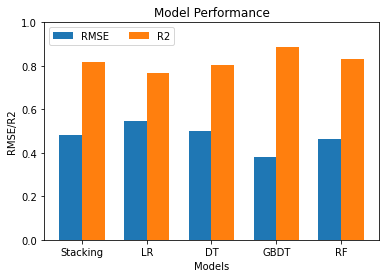

In [27]:
# Plot Results
RMSE_Results = [stack_rmse, lr_rmse, dt_final_rmse, gbdt_final_rmse, rf_final_rmse]
R2_Results = [stack_r2, lr_r2, dt_final_r2, gbdt_final_r2, rf_final_r2]

rg = np.arange(5)
width = 0.35

plt.bar(rg, RMSE_Results, width = width, label = 'RMSE')
plt.bar(rg + width, R2_Results, width = width, label = 'R2')

labels = ['Stacking', 'LR', 'DT', 'GBDT', 'RF']
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE/R2")
plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

Based on this graph of model performance, GBDT seems to be the best performing model on the test data. Ideally, a model would have a low root mean squared error and a high R2 value. GBDT has a root mean squared error of 0.3787473190475284 and an R2 value of 0.8872998665441272. These values are actually the lowest RMSE and highest R2 values of all the models, which makes it ideal.

The lowest performing model seems to be the Linear Regression (LR) model, which actually has the highest RMSE value of 0.546336386086321 and lowest R2 score of 0.7654985423156572. This does not come as a surprise to us because happiness may not be linearly correlated with factors such as listed in the feature columns. There may also be complex interactions between specific feature columns that a standard linear regression model may not be able to capture. And finally, there could also be collinearity between the features, because many of them could be highly correlated with one another (an example being GDP and healthy life expectancy). 